# Introduction to Numpy

Importing Libraries
First, we need to import the NumPy library. NumPy is a powerful library for numerical computations in Python.
 It's widely used in finance for data manipulation, mathematical computations, and handling multi-dimensional arrays.

In [1]:
import numpy as np

 **Example:** Creating a NumPy array
In finance, arrays can represent things like stock prices over time or daily returns for multiple stocks.

In [2]:
stock_prices = np.array([150, 152, 149, 153, 155])  # Example: stock prices over 5 days
print("Stock Prices Array:", stock_prices)

Stock Prices Array: [150 152 149 153 155]



## Accessing Elements in an Array
 You can access individual elements using indexing. In finance, this could represent accessing a specific day's price.


In [3]:
print("Stock Price on Day 3:", stock_prices[2])

Stock Price on Day 3: 149


## Operations on Arrays
 Arrays allow you to perform mathematical operations element-wise, which is useful for financial computations like calculating daily returns.

Daily returns = (Today's price - Yesterday's price) / Yesterday's price



In [4]:
stock_prices[1:]

array([152, 149, 153, 155])

In [5]:
stock_prices[:-1]

array([150, 152, 149, 153])

In [6]:
daily_returns = (stock_prices[1:] - stock_prices[:-1]) / stock_prices[:-1]
print("Daily Returns:", daily_returns)

Daily Returns: [ 0.01333333 -0.01973684  0.02684564  0.0130719 ]


**Example:** Portfolio Returns



In [7]:
portfolio_returns = np.array([
    [0.01, -0.005, 0.002],  # Day 1 returns
    [0.02, 0.01, -0.004],   # Day 2 returns
    [-0.01, 0.002, 0.005]   # Day 3 returns
])

average_returns = np.mean(portfolio_returns, axis=0)  # Mean return for each stock
print("Average Returns for Each Stock:", average_returns)

Average Returns for Each Stock: [0.00666667 0.00233333 0.001     ]


In [8]:
# Summing Total Portfolio Return for Each Day

total_daily_returns = np.sum(portfolio_returns, axis=1)
print("Total Portfolio Return for Each Day:", total_daily_returns)

Total Portfolio Return for Each Day: [ 0.007  0.026 -0.003]


In [9]:
# Covariance Matrix

cov_matrix = np.cov(portfolio_returns.T)  # Covariance matrix of the 3 stocks
print("Covariance Matrix:\n", cov_matrix)

Covariance Matrix:
 [[ 2.33333333e-04  4.16666667e-05 -6.50000000e-05]
 [ 4.16666667e-05  5.63333333e-05 -2.35000000e-05]
 [-6.50000000e-05 -2.35000000e-05  2.10000000e-05]]


! Warning  
If you are using return instead of log retrun you cannot get simple mean and sum for total return.

## Reshaping Arrays

In [10]:
array = np.array([1, 2, 3, 4, 5, 6])  # Example: 1D array of 6 elements
reshaped_array = array.reshape(2, 3)  # Reshaping to 2 rows and 3 columns
print("Original Array:", array)
print("Reshaped Array (2x3):\n", reshaped_array)

Original Array: [1 2 3 4 5 6]
Reshaped Array (2x3):
 [[1 2 3]
 [4 5 6]]


**Vertical Stacking (vstack)**


In [11]:
# vstack stacks arrays vertically (row-wise). Useful when combining datasets with the same number of columns.

array1 = np.array([1, 2, 3])
array2 = np.array([4, 5, 6])
vertical_stack = np.vstack((array1, array2))
print("Vertical Stack:\n", vertical_stack)

Vertical Stack:
 [[1 2 3]
 [4 5 6]]


**Horizontal Stacking (hstack)**

In [12]:

# hstack stacks arrays horizontally (column-wise). Useful when appending features to a dataset.

horizontal_stack = np.hstack((array1, array2))
print("Horizontal Stack:", horizontal_stack)



Horizontal Stack: [1 2 3 4 5 6]


**Concatenation**

In [13]:
# Concatenation generalizes stacking by allowing you to combine arrays along a specified axis.

concat_array = np.concatenate((array1.reshape(1, -1), array2.reshape(1, -1)), axis=0)
print("Concatenated Array:\n", concat_array)

Concatenated Array:
 [[1 2 3]
 [4 5 6]]


## Random Walk Simulation

 A common use of NumPy in finance is to simulate stock prices using a random walk model. This can help model potential future prices.

### Geometric Brownian Motion (GBM)

Geometric Brownian Motion (GBM) is a mathematical model used to describe the dynamics of a stock price or other financial asset over time. It is defined by the following stochastic differential equation (SDE):

$
dS_t = \mu S_t \, dt + \sigma S_t \, dW_t
$

#### Explanation of Terms:

1. **$ S_t $**: The price of the asset at time $ t $.
2. **$ \mu $**: The drift rate (mean rate of return) of the asset.
3. **$ \sigma$**: The volatility of the asset (standard deviation of returns).
4. **$ W_t $**: A Wiener process (or standard Brownian motion), which models the random fluctuations of the asset price.
5. **$ dt $**: An infinitesimally small time interval.


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import time
# Parameters for GBM
np.random.seed(42)  # For reproducibility
S0 = 100            # Initial stock price
mu = 0.05           # Drift (annualized return)
sigma = 0.2         # Volatility (annualized standard deviation)
T = 1               # Time horizon in years
steps = 252         # Number of steps (daily steps for a year)
paths = 1000         # Number of paths to simulate

# Time increments
dt = T / steps

# Initialize paths array
gbm_paths = np.zeros((steps + 1, paths))
gbm_paths[0] = S0  # Initial price for all paths

current_time = time.time()
# Simulate paths using a loop for each path
for p in range(paths):
    for t in range(1, steps + 1):
        z = np.random.normal(0, 1)  # Generate a single random noise for this step
        gbm_paths[t, p] = gbm_paths[t - 1, p] *(1 + mu *dt)  + gbm_paths[t - 1, p] *sigma * np.sqrt(dt) * z

end_time = time.time()
execution_time = end_time - current_time
print(f"Execution time: {execution_time} seconds")


Execution time: 0.9597840309143066 seconds


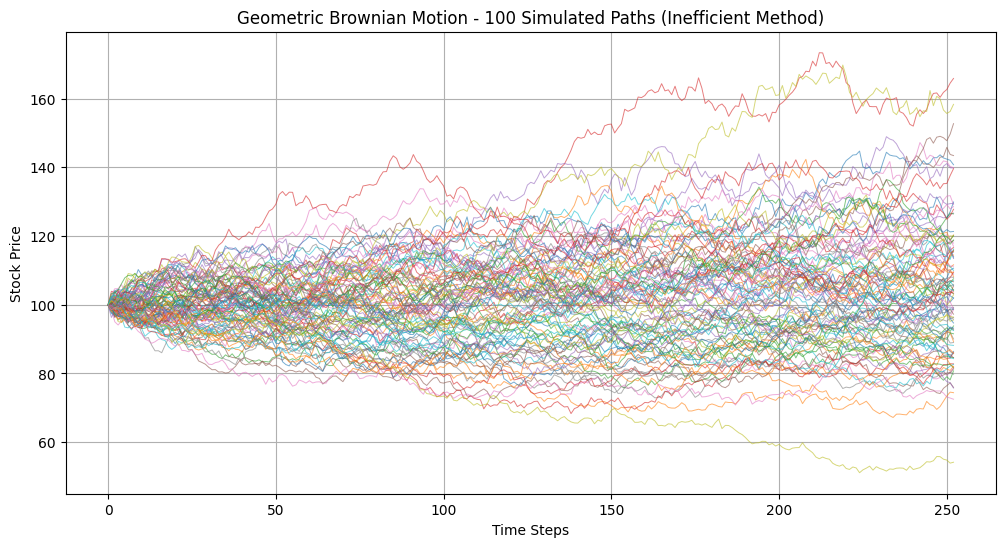

In [16]:
# Plot the GBM paths
plt.figure(figsize=(12, 6))
for i in range(100):
    plt.plot(gbm_paths[:, i], lw=0.7, alpha=0.6)
plt.title('Geometric Brownian Motion - 100 Simulated Paths (Inefficient Method)')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.grid(True)
plt.show()

# Do not use for loop in python as much as you can!

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for GBM
np.random.seed(42)  # For reproducibility
S0 = 100            # Initial stock price
mu = 0.05           # Drift (annualized return)
sigma = 0.2         # Volatility (annualized standard deviation)
T = 1               # Time horizon in years
steps = 252         # Number of steps (daily steps for a year)
paths = 1000         # Number of paths to simulate

# Time increments
dt = T / steps

# Simulate GBM paths
gbm_paths = np.zeros((steps + 1, paths))
gbm_paths[0] = S0  # Initial price for all paths
current_time = time.time()
# Simulate paths using a loop for each path
for t in range(1, steps + 1):
    # Generate random noise
    z = np.random.normal(0, 1, paths)
    # Compute the price at time t
    gbm_paths[t] = gbm_paths[t - 1] * (1 + mu *dt) +  gbm_paths[t - 1] *sigma * np.sqrt(dt) * z
end_time = time.time()
execution_time = end_time - current_time
print(f"Execution time: {execution_time} seconds")


Execution time: 0.016422510147094727 seconds


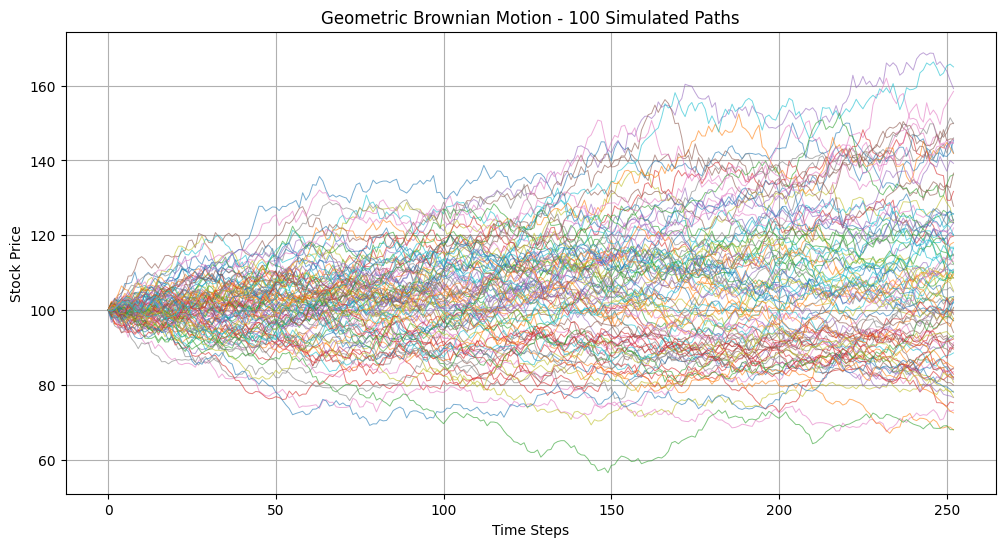

In [18]:
# Plot the GBM paths
plt.figure(figsize=(12, 6))
for i in range(100):
    plt.plot(gbm_paths[:, i], lw=0.7, alpha=0.6)
plt.title('Geometric Brownian Motion - 100 Simulated Paths')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.grid(True)
plt.show()


# Pandas

## Importing Libraries

In [19]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

 ## Fetching NVIDIA Stock Data

In [57]:

start_date = "2020-01-01"
end_date = "2025-01-01"
nvda_data = yf.download("NVDA", start=start_date, end=end_date)

/tmp/ipython-input-349924913.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  nvda_data = yf.download("NVDA", start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


In [58]:
nvda_data

Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2020-01-02,5.971746,5.971746,5.892343,5.942872,237536000
2020-01-03,5.876163,5.919973,5.827127,5.852019,205384000
2020-01-06,5.900805,5.906033,5.756683,5.782819,262636000
2020-01-07,5.972245,6.018046,5.884129,5.929183,314856000
2020-01-08,5.983446,6.024766,5.927937,5.968013,277108000
...,...,...,...,...,...
2024-12-24,140.197372,141.877094,138.627618,139.977407,105157000
2024-12-26,139.907410,140.827275,137.707768,139.677451,116205600


In [92]:

start_date = "2020-01-01"
end_date = "2025-01-01"
nvda_data_raw = yf.download("NVDA", start=start_date, end=end_date)

# Rename the columns to remove potential multi-index
nvda_data_raw.columns = ["Close", "High", "Low", "Open", "Volume"]

# Display the first few rows
nvda_data_raw.head()


/tmp/ipython-input-1306903132.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  nvda_data_raw = yf.download("NVDA", start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


,Close,High,Low,Open,Volume
Date,,,,,
2020-01-02,5.971746,5.971746,5.892343,5.942872,237536000
2020-01-03,5.876163,5.919973,5.827127,5.852019,205384000
2020-01-06,5.900805,5.906033,5.756683,5.782819,262636000
2020-01-07,5.972245,6.018046,5.884129,5.929183,314856000
2020-01-08,5.983446,6.024766,5.927937,5.968013,277108000


In [93]:
nvda_data_raw.columns

Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [94]:
print("\nData Information:")
nvda_data_raw.info()


Data Information:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2020-01-02 to 2024-12-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Open    1258 non-null   float64
 4   Volume  1258 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 59.0 KB


In [95]:
print("\nDescriptive Statistics:")
nvda_data_raw.describe()




Descriptive Statistics:


,Close,High,Low,Open,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,38.439743,39.149981,37.665585,38.444146,4.467728e+08
std,38.227709,38.938167,37.483279,38.289112,1.876933e+08
min,4.891637,5.228870,4.500106,4.983791,9.788400e+07
25%,13.571043,13.822175,13.336067,13.603067,3.084230e+08
50%,21.234504,21.741160,20.821238,21.168879,4.205830e+08
75%,45.619114,46.198627,44.963364,45.743538,5.467242e+08
max,148.845718,152.854800,146.226298,149.315621,1.543911e+09


In [96]:
# Check for missing values
print("\nChecking for Missing Values:")
print(nvda_data_raw.isnull().sum())



Checking for Missing Values:
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64


## Data Cleaning

In [98]:
# Rename columns for better readability
nvda_data_raw.reset_index(inplace=True)  # Ensure 'Date' is a column, not an index


nvda_data_raw

,index,Date,Close,High,Low,Open,Volume
0,0,2020-01-02,5.971746,5.971746,5.892343,5.942872,237536000
1,1,2020-01-03,5.876163,5.919973,5.827127,5.852019,205384000
2,2,2020-01-06,5.900805,5.906033,5.756683,5.782819,262636000
3,3,2020-01-07,5.972245,6.018046,5.884129,5.929183,314856000
4,4,2020-01-08,5.983446,6.024766,5.927937,5.968013,277108000
...,...,...,...,...,...,...,...
1253,1253,2024-12-24,140.197372,141.877094,138.627618,139.977407,105157000
1254,1254,2024-12-26,139.907410,140.827275,137.707768,139.677451,116205600
1255,1255,2024-12-27,136.987869,138.997554,134.688253,138.527629,170582600
1256,1256,2024-12-30,137.467804,140.247354,133.998363,134.808230,167734700


In [99]:
# Handle missing values
nvda_data_raw.fillna(method="ffill", inplace=True)

print("\nCleaned Data:")
nvda_data_raw.head()




Cleaned Data:


/tmp/ipython-input-621695180.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  nvda_data_raw.fillna(method="ffill", inplace=True)


,index,Date,Close,High,Low,Open,Volume
0,0,2020-01-02,5.971746,5.971746,5.892343,5.942872,237536000
1,1,2020-01-03,5.876163,5.919973,5.827127,5.852019,205384000
2,2,2020-01-06,5.900805,5.906033,5.756683,5.782819,262636000
3,3,2020-01-07,5.972245,6.018046,5.884129,5.929183,314856000
4,4,2020-01-08,5.983446,6.024766,5.927937,5.968013,277108000


In [66]:
!pip install ta

# Features

## Moving Average Convergence Divergence (MACD)

The **Moving Average Convergence Divergence (MACD)** is a technical indicator used in financial analysis to identify trends and potential buy/sell signals based on the relationship between moving averages of an asset's price.

---

### 1. Exponential Moving Average (EMA)

The **Exponential Moving Average (EMA)** of a time series $P_t$ is calculated recursively as:

$$
\text{EMA}_t^{(\alpha)} =
\begin{cases}
P_t & \text{if } t = 1, \\
\alpha P_t + (1 - \alpha) \text{EMA}_{t-1}^{(\alpha)} & \text{if } t > 1,
\end{cases}
$$

where the smoothing factor \( \alpha \) is defined as:

$$
\alpha = \frac{2}{N+1},
$$

and \( N \) is the number of periods used for the moving average.

Alternatively, the EMA can be expressed explicitly using weighted summation:

$$
\text{EMA}_t^{(\alpha)} = \sum_{i=0}^{t-1} \alpha (1 - \alpha)^i P_{t-i}.
$$

---

### 2. MACD Line

The **MACD Line** is the difference between two EMAs of the price series, calculated over different time periods:

$$
\text{MACD}_t = \text{EMA}_t^{(\alpha_{\text{short}})} - \text{EMA}_t^{(\alpha_{\text{long}})},
$$

where:
- $ \alpha_{\text{short}} = \frac{2}{N_{\text{short}}+1}$ for the short-term EMA (e.g., $ N_{\text{short}} = 12 $ days),
- $ \alpha_{\text{long}} = \frac{2}{N_{\text{long}}+1} $ for the long-term EMA (e.g., $ N_{\text{long}} = 26 $ days).

---

### 3. Signal Line

The **Signal Line** is the EMA of the MACD line itself, typically computed over a shorter period $ N_{\text{signal}} $ (e.g., $ N_{\text{signal}} = 9 $ days):

$$
\text{Signal}_t = \text{EMA}_t^{(\alpha_{\text{signal}})} \quad \text{of } \text{MACD}_t,
$$

where $ \alpha_{\text{signal}} = \frac{2}{N_{\text{signal}}+1} $.

---


## Relative Strength Index (RSI)

The **Relative Strength Index (RSI)** is a momentum oscillator that measures the speed and change of price movements, ranging from 0 to 100. It helps identify overbought and oversold conditions.

---

### RSI Calculation

1. **Gain and Loss**:
   - Gain: $ \text{Gain}_t = \max(P_t - P_{t-1}, 0) $
   - Loss: $ \text{Loss}_t = \max(P_{t-1} - P_t, 0) $

2. **Average Gain and Loss** (initially over $ N $ periods, typically $ N = 14 $):
   - $ \text{Avg Gain}_t = \frac{\sum_{i=0}^{N-1} \text{Gain}_{t-i}}{N} $
   - $ \text{Avg Loss}_t = \frac{\sum_{i=0}^{N-1} \text{Loss}_{t-i}}{N} $

   Afterward, averages are smoothed:
   - $ \text{Avg Gain}_t = \frac{(N-1) \cdot \text{Avg Gain}_{t-1} + \text{Gain}_t}{N} $
   - $ \text{Avg Loss}_t = \frac{(N-1) \cdot \text{Avg Loss}_{t-1} + \text{Loss}_t}{N} $

3. **Relative Strength (RS)**:
   - $ \text{RS}_t = \frac{\text{Avg Gain}_t}{\text{Avg Loss}_t} $

4. **RSI**:
   - $ \text{RSI}_t = 100 - \frac{100}{1 + \text{RS}_t} $

---

### Interpretation

- **Overbought**: $ \text{RSI} > 70 $
- **Oversold**: $ \text{RSI} < 30 $
- **Neutral**: $ 30 \leq \text{RSI} \leq 70 $

The RSI is used to detect potential reversals, momentum strength, and overbought/oversold conditions.


In [106]:

from ta.momentum import RSIIndicator
from ta.trend import SMAIndicator, EMAIndicator, MACD

def compute_technical_indicators(data):
    """
    Computes technical indicators for a given dataset of a stock.

    Parameters:
    - data (pd.DataFrame): DataFrame containing stock data with columns:
                           ['Open', 'High', 'Low', 'Close', 'Volume']

    Returns:
    - pd.DataFrame: Enhanced DataFrame with additional columns for technical indicators and lagged returns.
    """
    # Ensure the dataset has the required columns
    required_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
    if not all(col in data.columns for col in required_columns):
        raise ValueError(f"Dataset must contain the following columns: {required_columns}")

    # Simple Moving Average (SMA)
    data['SMA_20'] = SMAIndicator(close=data['Close'], window=20).sma_indicator()
    data['SMA_50'] = SMAIndicator(close=data['Close'], window=50).sma_indicator()

    # Exponential Moving Average (EMA)
    data['EMA_20'] = EMAIndicator(close=data['Close'], window=20).ema_indicator()
    data['EMA_50'] = EMAIndicator(close=data['Close'], window=50).ema_indicator()

    # Relative Strength Index (RSI)
    data['RSI'] = RSIIndicator(close=data['Close'], window=14).rsi()

    # Moving Average Convergence Divergence (MACD)
    macd_indicator = MACD(close=data['Close'], window_slow=26, window_fast=12, window_sign=9)
    data['MACD'] = macd_indicator.macd()
    data['MACD_Signal'] = macd_indicator.macd_signal()

    # Returns and lagged returns
    data['Return'] = np.log(data['Close']).pct_change()
    data['Lag_Return_1'] = data['Return'].shift(1)
    data['Lag_Return_2'] = data['Return'].shift(2)
    data['Lag_Return_3'] = data['Return'].shift(3)

    # Tomorrow's return (forward-looking)
    data['Tomorrow_Return'] = data['Return'].shift(-1)

    # Dropping NaN values caused by rolling calculations
    data = data.dropna()

    return data



##6. Visualization

In [107]:
nvda_data = compute_technical_indicators(nvda_data_raw)

In [108]:
nvda_data

,index,Date,Close,High,Low,Open,Volume,SMA_20,SMA_50,EMA_20,EMA_50,RSI,MACD,MACD_Signal,Return,Lag_Return_1,Lag_Return_2,Lag_Return_3,Tomorrow_Return
49,49,2020-03-13,5.998480,6.002963,5.469716,5.740947,634836000,6.730236,6.405579,6.451515,6.417271,44.435957,-0.139963,0.004275,0.063785,-0.071931,-0.030759,0.034121,-0.113859
50,50,2020-03-16,4.891637,5.631360,4.831861,5.290390,726972000,6.614151,6.383977,6.302955,6.357442,35.289254,-0.244576,-0.045495,-0.113859,0.063785,-0.071931,-0.030759,0.063613
51,51,2020-03-17,5.411437,5.500851,4.757143,5.003966,833632000,6.515617,6.374683,6.218049,6.320344,41.390678,-0.282284,-0.092853,0.063613,-0.113859,0.063785,-0.071931,-0.040759
52,52,2020-03-18,5.051536,5.228870,4.500106,4.983791,874268000,6.376525,6.357697,6.106952,6.270587,38.671856,-0.337321,-0.141747,-0.040759,0.063613,-0.113859,0.063785,0.030149
53,53,2020-03-19,5.304338,5.397986,4.816669,5.030117,765512000,6.257540,6.344339,6.030513,6.232695,41.574943,-0.356431,-0.184684,0.030149,-0.040759,0.063613,-0.113859,-0.020671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,1252,2024-12-23,139.647446,139.767421,135.098177,136.257994,176053500,136.934048,139.688259,136.684417,136.153028,53.425796,-1.653523,-1.353129,0.007390,0.006218,0.002807,-0.002344,0.000796
1253,1253,2024-12-24,140.197372,141.877094,138.627618,139.977407,105157000,137.144483,139.731442,137.018984,136.311630,54.123021,-1.154593,-1.313422,0.000796,0.007390,0.006218,0.002807,-0.000419
1254,1254,2024-12-26,139.907410,140.827275,137.707768,139.677451,116205600,137.295430,139.898196,137.294072,136.452641,53.666821,-0.773668,-1.205471,-0.000419,0.000796,0.007390,0.006218,-0.004268
1255,1255,2024-12-27,136.987869,138.997554,134.688253,138.527629,170582600,137.379382,139.924179,137.264910,136.473630,49.172606,-0.699302,-1.104237,-0.004268,-0.000419,0.000796,0.007390,0.000711


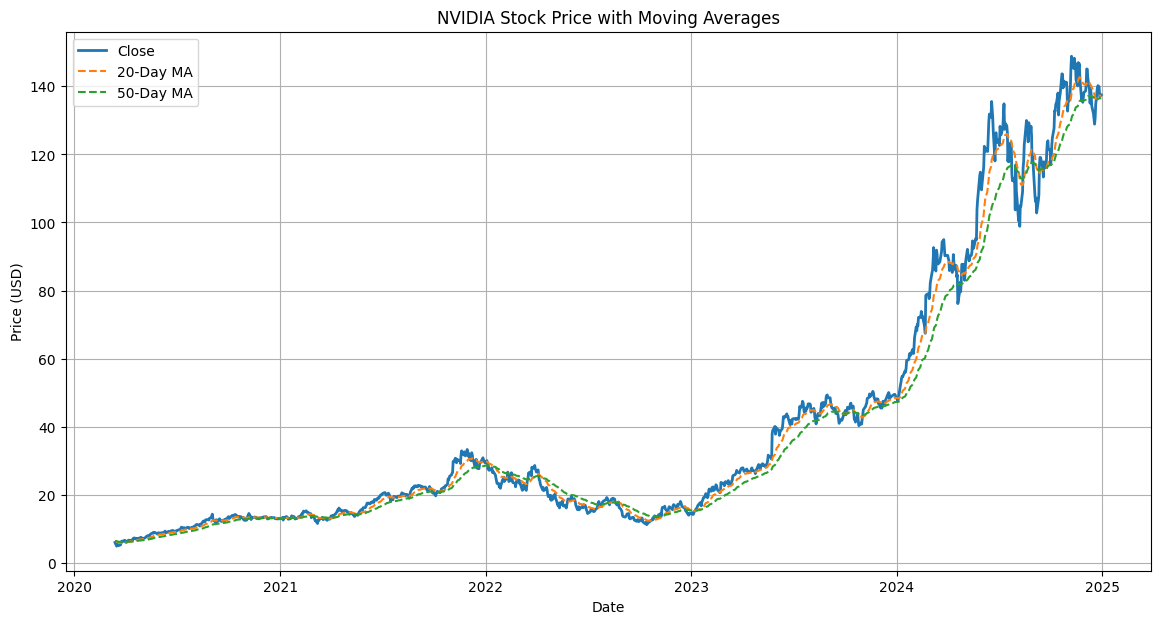

In [109]:

# Plot Adjusted Close and Moving Averages
plt.figure(figsize=(14, 7))
plt.plot(nvda_data["Date"], nvda_data["Close"], label="Close", linewidth=2)
plt.plot(nvda_data["Date"], nvda_data["EMA_20"], label="20-Day MA", linestyle="--")
plt.plot(nvda_data["Date"], nvda_data["EMA_50"], label="50-Day MA", linestyle="--")
plt.title("NVIDIA Stock Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid()
plt.show()



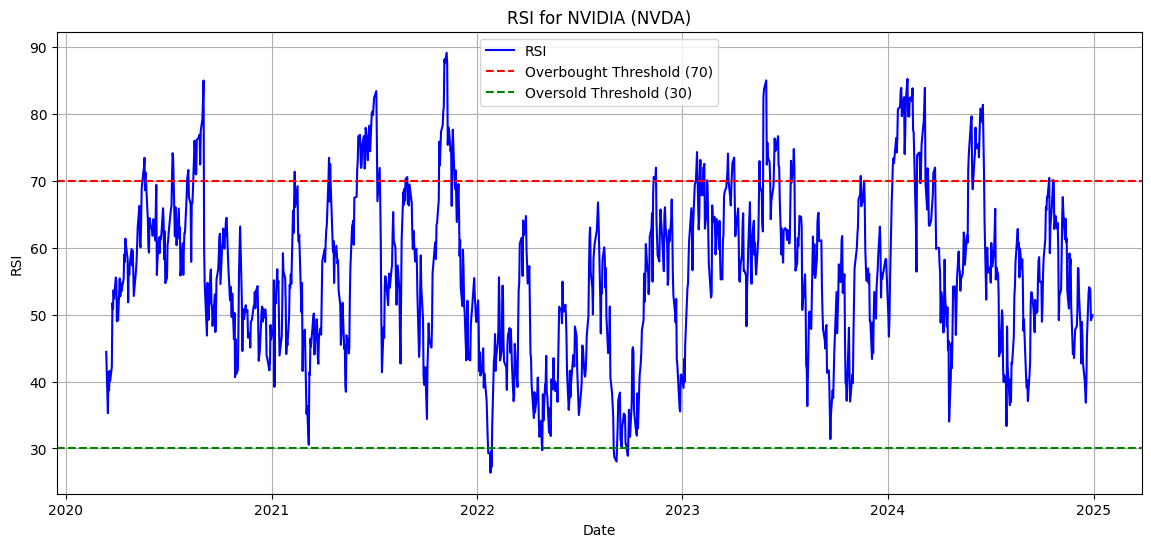

In [110]:
# Plot RSI
plt.figure(figsize=(14, 6))
plt.plot(nvda_data['Date'], nvda_data['RSI'], label='RSI', color='blue')
plt.axhline(70, color='red', linestyle='--', label='Overbought Threshold (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold Threshold (30)')
plt.title('RSI for NVIDIA (NVDA)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.grid()
plt.show()



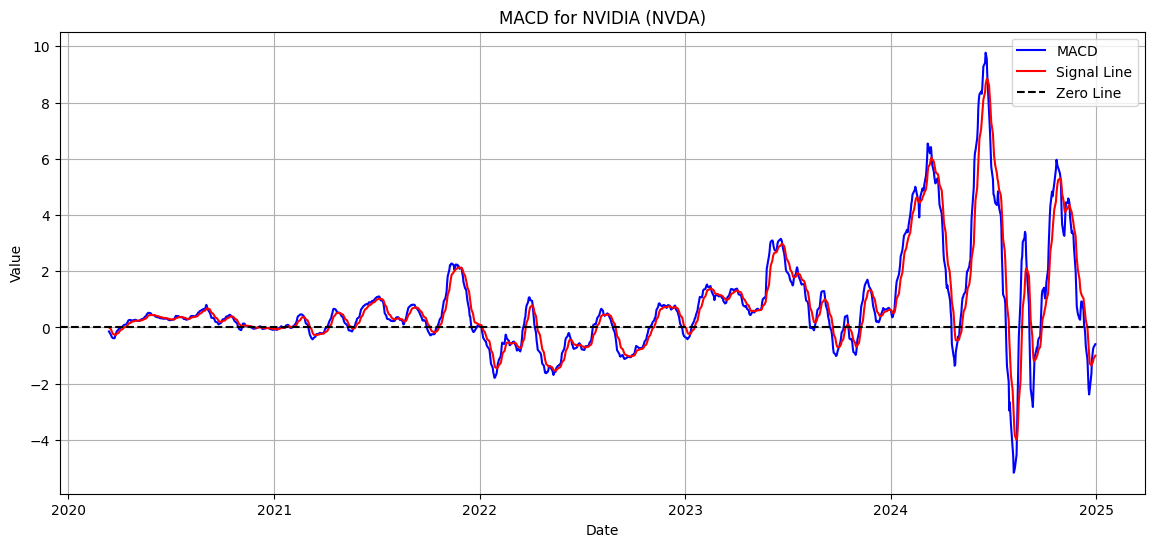

In [111]:
# Plot MACD and Signal Line
plt.figure(figsize=(14, 6))
plt.plot(nvda_data['Date'], nvda_data['MACD'], label='MACD', color='blue')
plt.plot(nvda_data['Date'], nvda_data['MACD_Signal'], label='Signal Line', color='red')
plt.axhline(0, color='black', linestyle='--', label='Zero Line')
plt.title('MACD for NVIDIA (NVDA)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

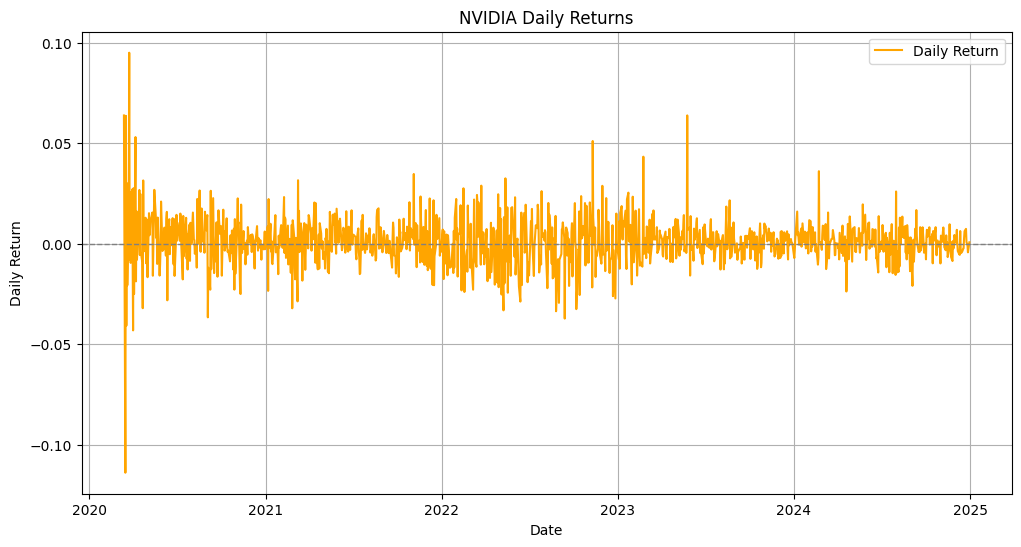

In [113]:
# Plot Daily Returns
plt.figure(figsize=(12, 6))
plt.plot(nvda_data["Date"], nvda_data["Return"], label="Daily Return", color="orange")
plt.axhline(y=0, color="gray", linestyle="--", linewidth=1)
plt.title("NVIDIA Daily Returns")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.legend()
plt.grid()
plt.show()




In [114]:
nvda_data

,index,Date,Close,High,Low,Open,Volume,SMA_20,SMA_50,EMA_20,EMA_50,RSI,MACD,MACD_Signal,Return,Lag_Return_1,Lag_Return_2,Lag_Return_3,Tomorrow_Return
49,49,2020-03-13,5.998480,6.002963,5.469716,5.740947,634836000,6.730236,6.405579,6.451515,6.417271,44.435957,-0.139963,0.004275,0.063785,-0.071931,-0.030759,0.034121,-0.113859
50,50,2020-03-16,4.891637,5.631360,4.831861,5.290390,726972000,6.614151,6.383977,6.302955,6.357442,35.289254,-0.244576,-0.045495,-0.113859,0.063785,-0.071931,-0.030759,0.063613
51,51,2020-03-17,5.411437,5.500851,4.757143,5.003966,833632000,6.515617,6.374683,6.218049,6.320344,41.390678,-0.282284,-0.092853,0.063613,-0.113859,0.063785,-0.071931,-0.040759
52,52,2020-03-18,5.051536,5.228870,4.500106,4.983791,874268000,6.376525,6.357697,6.106952,6.270587,38.671856,-0.337321,-0.141747,-0.040759,0.063613,-0.113859,0.063785,0.030149
53,53,2020-03-19,5.304338,5.397986,4.816669,5.030117,765512000,6.257540,6.344339,6.030513,6.232695,41.574943,-0.356431,-0.184684,0.030149,-0.040759,0.063613,-0.113859,-0.020671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,1252,2024-12-23,139.647446,139.767421,135.098177,136.257994,176053500,136.934048,139.688259,136.684417,136.153028,53.425796,-1.653523,-1.353129,0.007390,0.006218,0.002807,-0.002344,0.000796
1253,1253,2024-12-24,140.197372,141.877094,138.627618,139.977407,105157000,137.144483,139.731442,137.018984,136.311630,54.123021,-1.154593,-1.313422,0.000796,0.007390,0.006218,0.002807,-0.000419
1254,1254,2024-12-26,139.907410,140.827275,137.707768,139.677451,116205600,137.295430,139.898196,137.294072,136.452641,53.666821,-0.773668,-1.205471,-0.000419,0.000796,0.007390,0.006218,-0.004268
1255,1255,2024-12-27,136.987869,138.997554,134.688253,138.527629,170582600,137.379382,139.924179,137.264910,136.473630,49.172606,-0.699302,-1.104237,-0.004268,-0.000419,0.000796,0.007390,0.000711


In [115]:
montly_return = nvda_data['Return'].resample('M').sum()

/tmp/ipython-input-266145346.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  montly_return = nvda_data['Return'].resample('M').sum()


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

In [116]:
nvda_data.set_index('Date', inplace=True)

In [117]:
montly_return = nvda_data['Return'].resample('M').sum()

/tmp/ipython-input-266145346.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  montly_return = nvda_data['Return'].resample('M').sum()


In [118]:
realized_volatility = nvda_data['Return'].resample('M').std() *  np.sqrt(25)

/tmp/ipython-input-2277383130.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  realized_volatility = nvda_data['Return'].resample('M').std() *  np.sqrt(25)


In [119]:
realized_volatility

,Return
Date,
2020-03-31,0.265296
2020-04-30,0.116547
2020-05-31,0.064993
2020-06-30,0.054215
2020-07-31,0.044709
2020-08-31,0.048994
2020-09-30,0.078461
2020-10-31,0.049564
2020-11-30,0.060405


In [120]:
result = pd.DataFrame({
        'Monthly_Return': montly_return,
        'Realized_Volatility': realized_volatility
    })

In [121]:
result

,Monthly_Return,Realized_Volatility
Date,,
2020-03-31,0.128647,0.265296
2020-04-30,0.058914,0.116547
2020-05-31,0.095276,0.064993
2020-06-30,0.032081,0.054215
2020-07-31,0.049175,0.044709
2020-08-31,0.094622,0.048994
2020-09-30,0.007057,0.078461
2020-10-31,-0.028787,0.049564
2020-11-30,0.027562,0.060405


In [122]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
import numpy as np

### Distribution of returns & Fat tail distribution  

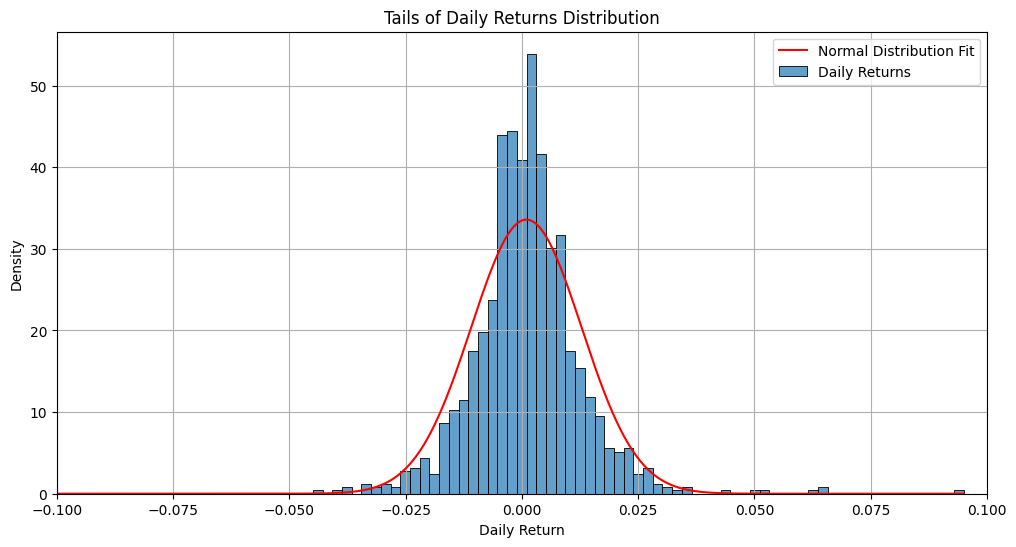

In [123]:
# Fit a normal distribution to the daily returns
mean_return = nvda_data["Return"].mean()
std_return = nvda_data["Return"].std()

# Generate a normal distribution curve
x = np.linspace(nvda_data["Return"].min(), nvda_data["Return"].max(), 1000)
pdf = norm.pdf(x, mean_return, std_return)




# Compare the tails
plt.figure(figsize=(12, 6))
sns.histplot(nvda_data["Return"], bins=100, kde=False, label="Daily Returns", stat="density", alpha=0.7)
plt.plot(x, pdf, color="red", label="Normal Distribution Fit")
plt.xlim(-0.1,0.1)
plt.title("Tails of Daily Returns Distribution")
plt.xlabel("Daily Return")
plt.ylabel("Density")
plt.legend()
plt.grid()
plt.show()

In [124]:
std_return

0.011878846081147363

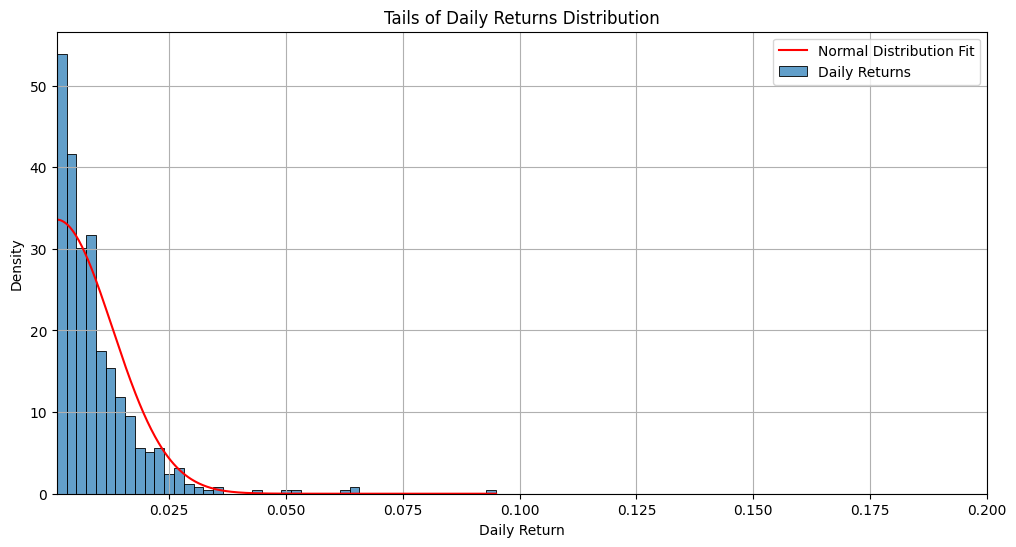

In [133]:
plt.figure(figsize=(12, 6))
sns.histplot(nvda_data["Return"], bins=100, kde=False, label="Daily Returns", stat="density", alpha=0.7)
plt.plot(x, pdf, color="red", label="Normal Distribution Fit")
plt.xlim(0.001,0.2)  # Focus on the tails
plt.title("Tails of Daily Returns Distribution")
plt.xlabel("Daily Return")
plt.ylabel("Density")
plt.legend()
plt.grid()
plt.show()

In [134]:
# Compute the probability that the normal distribution is greater than 0.1
probability_greater_0_1 = 1 - norm.cdf(0.05, loc=mean_return, scale=std_return)
probability_greater_0_1


np.float64(1.826188784526117e-05)

In [135]:
np.sum(nvda_data["Return"] > 0.05)/len(nvda_data)

np.float64(0.004966887417218543)

As we can see the probabilty of tail in real data is more that 3 times to the probabilty of the tail normal distribution

In [137]:
nvda_data.to_csv("nvda_stock_data.csv", index=False)

# Creating Dataset

In [141]:
cd /content/drive/MyDrive/Teaching/Math 628 - Fall 2025/Math_628_Fall_2025

/content/drive/MyDrive/Teaching/Math 628 - Fall 2025/Math_628_Fall_2025


In [142]:

from datetime import datetime, timedelta

def get_tickers_and_sectors_from_wikipedia(url):
    """
    Scrapes ticker symbols and sectors from a Wikipedia page.
    :param url: URL of the Wikipedia page with ticker symbols and sectors
    :return: DataFrame with 'Ticker' and 'Sector'
    """
    tables = pd.read_html(url)
    for table in tables:
        if 'Symbol' in table.columns and 'GICS Sector' in table.columns:
            # Rename columns for consistency
            table = table.rename(columns={"Symbol": "Ticker", "GICS Sector": "Sector"})
            return table[['Ticker', 'Sector']]
    return pd.DataFrame()  # Return empty DataFrame if not found

# Define the Wikipedia URL (example: S&P 500 companies)
wiki_url = "List of S&P 500 companies - Wikipedia.html"
tickers_and_sectors = get_tickers_and_sectors_from_wikipedia(wiki_url)


In [143]:
tickers_and_sectors

,Ticker,Sector
0,MMM,Industrials
1,AOS,Industrials
2,ABT,Health Care
3,ABBV,Health Care
4,ACN,Information Technology
...,...,...
499,XYL,Industrials
500,YUM,Consumer Discretionary
501,ZBRA,Information Technology
502,ZBH,Health Care


In [144]:
dictionary = {}

dictionary['Names'] = ["Alex" , "John"]
dictionary["Ages"] = [22,23]

In [145]:
dictionary.keys()

dict_keys(['Names', 'Ages'])

In [146]:
profile = {}

In [147]:
profile['Alex'] = {'Age':22 , 'Gender':'Male' , 'Degree' : 'Master'}
profile['John'] = {'Age':23 , 'Gender':'Male', 'Degree' : 'PhD'}

In [148]:
from tqdm import tqdm


start_date = (datetime.now() - timedelta(days=365 * 20)).strftime('%Y-%m-%d')  # 20 years ago
end_date = datetime.now().strftime('%Y-%m-%d')

icker_data_dict = {}

# Use tqdm to show a progress bar
for _, row in tqdm(tickers_and_sectors.iterrows(), total=len(tickers_and_sectors), desc="Processing Tickers"):
    ticker = row['Ticker']
    sector = row['Sector']
    try:
        # Download historical data
        data = yf.download(ticker, start=start_date, end=end_date, progress=False)
        data.columns = ["Close", "High", "Low", "Open", "Volume"]


        # Add ticker and sector columns
        data['Ticker'] = ticker
        data['Sector'] = sector
        data = compute_technical_indicators(data)
        # Store the data in the dictionary with ticker as the key
        icker_data_dict[ticker] = data
    except Exception as e:
        print(f"\nFailed to process {ticker}: {e}")


Processing Tickers:   0%|          | 0/504 [00:00<?, ?it/s]/tmp/ipython-input-2873182416.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)
Processing Tickers:   0%|          | 1/504 [00:00<06:10,  1.36it/s]/tmp/ipython-input-2873182416.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)
Processing Tickers:   0%|          | 2/504 [00:01<06:48,  1.23it/s]/tmp/ipython-input-2873182416.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)
Processing Tickers:   1%|          | 3/504 [00:02<05:30,  1.52it/s]/tmp/ipython-input-2873182416.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, en


Failed to process BRK.B: Length mismatch: Expected axis has 6 elements, new values have 5 elements


Processing Tickers:  12%|█▏        | 61/504 [00:26<03:34,  2.06it/s]/tmp/ipython-input-2873182416.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)
Processing Tickers:  12%|█▏        | 62/504 [00:27<03:22,  2.19it/s]/tmp/ipython-input-2873182416.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)
Processing Tickers:  12%|█▎        | 63/504 [00:27<02:57,  2.48it/s]/tmp/ipython-input-2873182416.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)
Processing Tickers:  13%|█▎        | 64/504 [00:27<02:54,  2.52it/s]/tmp/ipython-input-2873182416.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=st


Failed to process BF.B: Length mismatch: Expected axis has 6 elements, new values have 5 elements


Processing Tickers:  15%|█▌        | 76/504 [00:34<03:02,  2.34it/s]/tmp/ipython-input-2873182416.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)
Processing Tickers:  15%|█▌        | 77/504 [00:34<02:55,  2.44it/s]/tmp/ipython-input-2873182416.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)
Processing Tickers:  15%|█▌        | 78/504 [00:34<03:01,  2.34it/s]/tmp/ipython-input-2873182416.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)
Processing Tickers:  16%|█▌        | 79/504 [00:35<03:08,  2.25it/s]/tmp/ipython-input-2873182416.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=st

## Saving Dataset

In [151]:
import pickle

# Save the dictionary to a file
with open('ticker_data_dict.pkl', 'wb') as file:
    pickle.dump(icker_data_dict, file)


In [152]:
# Load the dictionary from the file
with open('ticker_data_dict.pkl', 'rb') as file:
    loaded_dict = pickle.load(file)

# Now, `loaded_dict` contains your original dictionary


## Feature Analysis

In this section, our goal is to determine which features are most effective at explaining tomorrow's returns. As a first step, we focus on the squared correlation coefficient. In the context of linear regression, this value corresponds to the coefficient of determination, commonly known as
$ R^2 $, which measures the proportion of variance in tomorrow's returns explained by each feature.

In [153]:
selected_columns = ['SMA_20', 'SMA_50', 'EMA_20', 'EMA_50', 'RSI', 'MACD', 'MACD_Signal','Return' ,  'Lag_Return_1', 'Lag_Return_2', 'Lag_Return_3' , 'Tomorrow_Return']

In [154]:
icker_data_dict['AAPL'][selected_columns].corr()

,SMA_20,SMA_50,EMA_20,EMA_50,RSI,MACD,MACD_Signal,Return,Lag_Return_1,Lag_Return_2,Lag_Return_3,Tomorrow_Return
SMA_20,1.000000,0.998701,0.999922,0.999289,-0.061896,0.165283,0.185104,-0.023021,-0.022923,-0.023107,-0.022924,-0.023253
SMA_50,0.998701,1.000000,0.998778,0.999810,-0.079378,0.124608,0.138134,-0.023081,-0.023132,-0.023452,-0.023412,-0.023158
EMA_20,0.999922,0.998778,1.000000,0.999369,-0.058057,0.169625,0.186087,-0.022847,-0.022582,-0.022621,-0.022340,-0.023296
EMA_50,0.999289,0.999810,0.999369,1.000000,-0.072687,0.138713,0.152762,-0.022969,-0.022936,-0.023179,-0.023067,-0.023140
RSI,-0.061896,-0.079378,-0.058057,-0.072687,1.000000,0.516728,0.420596,0.229063,0.216715,0.200398,0.189194,0.008488
MACD,0.165283,0.124608,0.169625,0.138713,0.516728,1.000000,0.948981,0.009592,0.021908,0.031416,0.038072,-0.006954
MACD_Signal,0.185104,0.138134,0.186087,0.152762,0.420596,0.948981,1.000000,-0.002791,0.002435,0.008587,0.015066,-0.006016
Return,-0.023021,-0.023081,-0.022847,-0.022969,0.229063,0.009592,-0.002791,1.000000,-0.006501,-0.023093,0.032048,-0.006470
Lag_Return_1,-0.022923,-0.023132,-0.022582,-0.022936,0.216715,0.021908,0.002435,-0.006501,1.000000,-0.006190,-0.023034,-0.023004
Lag_Return_2,-0.023107,-0.023452,-0.022621,-0.023179,0.200398,0.031416,0.008587,-0.023093,-0.006190,1.000000,-0.006003,0.032065


In [155]:
icker_data_dict['AAPL'][selected_columns].corr()['Tomorrow_Return'][:-1]**2

,Tomorrow_Return
SMA_20,0.000541
SMA_50,0.000536
EMA_20,0.000543
EMA_50,0.000535
RSI,0.000072
MACD,0.000048
MACD_Signal,0.000036
Return,0.000042
Lag_Return_1,0.000529
Lag_Return_2,0.001028


In [156]:
corr_result = []

for x in icker_data_dict.keys():
    corr = (icker_data_dict[x][selected_columns].corr()['Tomorrow_Return'][:-1])**2
    corr_result.append(corr)



In [157]:
corr_result = pd.DataFrame(corr_result)

In [158]:
mean_abs_corr = corr_result.mean()

sorted_corr = mean_abs_corr.sort_values(ascending=False)

sorted_corr

,0
Return,0.005012
Lag_Return_1,0.001542
Lag_Return_3,0.001417
Lag_Return_2,0.001089
RSI,0.000777
EMA_20,0.000583
SMA_20,0.000575
EMA_50,0.000545
SMA_50,0.000525
MACD,0.000394


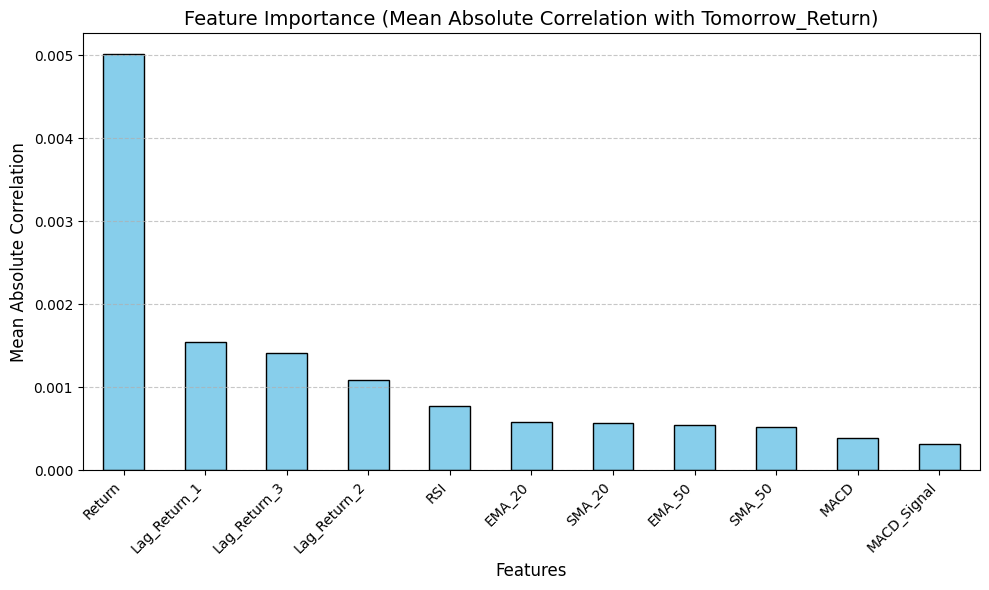

In [159]:
# Plot bar chart
plt.figure(figsize=(10, 6))
sorted_corr.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Feature Importance (Mean Absolute Correlation with Tomorrow_Return)', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Mean Absolute Correlation', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Exercise:

Dose it hold for montly data?